In [1]:
pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 10.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
link = "https://raw.githubusercontent.com/enricochandran/01.-Machine-Learning/refs/heads/main/01.%20Week%201/Automobile/Automobile.csv"
data = pd.read_csv(link)
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              201 non-null    float64
 1   highway-mpg        205 non-null    int64  
 2   city-mpg           205 non-null    int64  
 3   peak-rpm           203 non-null    float64
 4   horsepower         203 non-null    float64
 5   compression-ratio  205 non-null    float64
 6   stroke             201 non-null    float64
 7   bore               201 non-null    float64
 8   fuel-system        205 non-null    object 
 9   engine-size        205 non-null    int64  
 10  num-of-cylinders   205 non-null    int64  
 11  engine-type        205 non-null    object 
 12  curb-weight        205 non-null    int64  
 13  height             205 non-null    float64
 14  width              205 non-null    float64
 15  length             205 non-null    float64
 16  wheel-base         205 non

In [51]:
print("Jumlah data kosong : ")
print(data.isnull().sum())

total_missing = data.isnull().sum().sum()
print("Total missing values:", total_missing)
print("Jumlah data duplikat : ",data.duplicated().sum())

Jumlah data kosong : 
price                 4
highway-mpg           0
city-mpg              0
peak-rpm              2
horsepower            2
compression-ratio     0
stroke                4
bore                  4
fuel-system           0
engine-size           0
num-of-cylinders      0
engine-type           0
curb-weight           0
height                0
width                 0
length                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
num-of-doors          2
aspiration            0
fuel-type             0
make                  0
normalized-losses    41
symboling             0
dtype: int64
Total missing values: 59
Jumlah data duplikat :  0


In [52]:
for col in data.select_dtypes(include=["number"]).columns:
    data[col] = data[col].fillna(data[col].median())

In [53]:
data_numeric = pd.get_dummies(data, drop_first=True)

scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_numeric), columns=data_numeric.columns)

In [54]:
print("Jumlah data kosong : ")
print(data.isnull().sum())

total_missing = data.isnull().sum().sum()
print("Total missing values:", total_missing)
print("Jumlah data duplikat : ",data.duplicated().sum())

Jumlah data kosong : 
price                0
highway-mpg          0
city-mpg             0
peak-rpm             0
horsepower           0
compression-ratio    0
stroke               0
bore                 0
fuel-system          0
engine-size          0
num-of-cylinders     0
engine-type          0
curb-weight          0
height               0
width                0
length               0
wheel-base           0
engine-location      0
drive-wheels         0
body-style           0
num-of-doors         0
aspiration           0
fuel-type            0
make                 0
normalized-losses    0
symboling            0
dtype: int64
Total missing values: 0
Jumlah data duplikat :  0


In [55]:
X = data.drop(columns='symboling', axis=1)
y = data['symboling']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [57]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:}')
print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')

MSE: 0.5888851356323299
RMSE: 0.7673885167451556
R-squared: 0.6337096340824149


w[0]: 0.393906  b: -0.031804


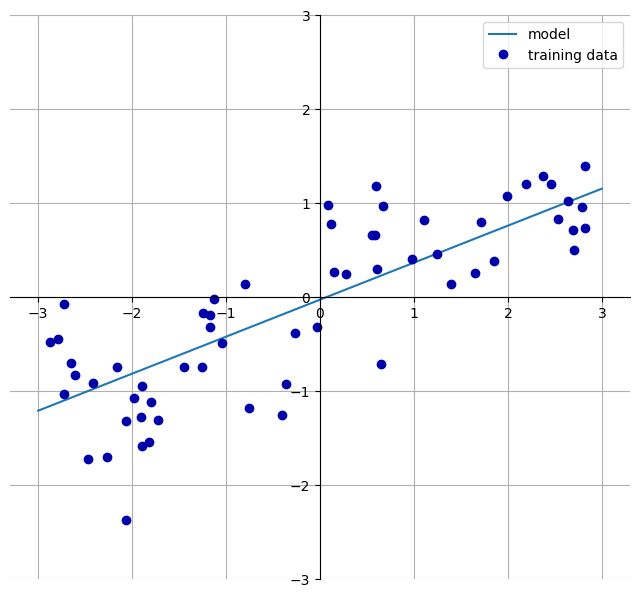

In [43]:
mglearn.plots.plot_linear_regression_wave()

# **1. Mean Squared Error (MSE)**
MSE adalah metrik yang mengukur rata-rata kuadrat selisih antara nilai prediksi dan nilai aktual. Semakin kecil nilai MSE, semakin baik model.

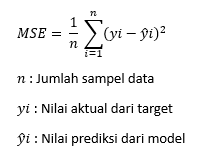

Selisih antara nilai prediksi dan nilai aktual dikuadratkan untuk menghindari nilai negatif dan memberikan penekanan lebih pada kesalahan yang besar.
Rata-rata dari semua selisih kuadrat dihitung lalu akan mendapatkan MSE.

# **2. Root Mean Squared Error (RMSE)**
RMSE adalah akar kuadrat dari MSE. Ini memberikan gambaran tentang besarnya kesalahan dalam satuan yang sama dengan target.
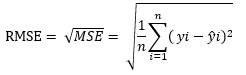


# **3. R-squared (Koefisien Determinasi)**
R-squared mengukur seberapa baik variabilitas target dapat dijelaskan oleh model. Nilainya berkisar antara 0 dan 1, di mana 1 menunjukkan model yang sempurna.

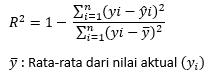